ChatGPT: The advancement of knowledge and incorporation for its users - Appendix B: Python code for data analysis


# Introduction 
This jupyter python notebook is used to perform the required data analysis needed as outlined in the research proposal generated in CONL717 - Applied Research Methods; to be applied to the data collection obtained as part of research in module CONL718 - Dissertation.

The code presented here shall be broken down into the following steps:

1. Introduction
2. Import of Initial Libraries and Configuration 
3. Ingestion of data collected from survey responses
4. Data Pre-processing
5. Summary Statistics, Descriptive Analysis of Research questions
6. Pearson's Correlation Coefficient and Hypothesis Testing 
7. Download output of formatted data and analysis (where applicable)
8. Additional insights where needed and uncovered from ydata-profiling report (Appendix C)

\pagebreak

# Import of Initial Libraries and Configuration

In [1]:
#=====================================
# Import of relevant libraries needed
#-------------------------------------
import os             as os                # System related activities.
import pandas         as pd                # Data analysis and manipulation. 
import numpy          as np                # Operations on arrays. 
import plotly.express as px                # Interactive data visualisations.
import plotly.io      as pio               # Render plotly charts in VScode.
import nltk           as nltk              # Natural language toolkit.
import warnings                            # Suppress warnings of deprecation.

from ydata_profiling  import ProfileReport # Generate ydata-profiler report.
from nltk.corpus      import stopwords     # Remove stopwords.
from scipy.stats      import binom_test    # Create binomial test
from scipy.stats      import pearsonr      # Pearson's Correlation Coefficient.
from IPython.display  import Image         # Bring saved images into notebook.
from tabulate         import tabulate      # Data presentation in pdf output.

In [3]:
#=====================================
# Suppress deprecated warnings of functions used.
#-------------------------------------
warnings.filterwarnings("ignore") 

In [4]:
#=====================================
# Allow plotly  to render in VSCode.
#-------------------------------------
pio.renderers.default = 'notebook'

In [5]:
#=====================================
# Configure stopwords to use.
#-------------------------------------
nltk.download('stopwords')                    
stop_words = stopwords.words('english')

# Extend stopword library with words based on this study.
#-------------------------------------
stop_words.extend(['im','chatgpt'])        

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lothe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#=====================================
# Set where to locate csv file of collected responses.
#-------------------------------------
folderPath = "C:/Users/lothe/OneDrive/Wrexham Uni (Masters)/CONL718 - Dissertation/Data/"
filepath   = "C:/Users/lothe/OneDrive/Wrexham Uni (Masters)/CONL718 - Dissertation/Data/Dissertation Survey - Louis Othen.csv"

# Condition changing current working directory if not to specified folder path.
#-------------------------------------
if os.getcwd() != folderPath:
    os.chdir(folderPath)

# Confirm where folder path currently points.
#-------------------------------------
print(os.getcwd())

C:\Users\lothe\OneDrive\Wrexham Uni (Masters)\CONL718 - Dissertation\Data


Now the libraries are applied to this script, the data collected from the survey, can now be uploaded.

\pagebreak

# Ingestion of Data Collected from Survey Responses

In [7]:
# Ingest csv file of collected responses from survey.
#----------------------------------------
data = pd.read_csv(filepath)

## Preview Dataset in Raw Format

In [8]:
# Preview dataset in raw format.
#----------------------------------------
col_w_s = 23
col_w = [col_w_s,col_w_s,col_w_s,col_w_s]
h_fmt = 'keys'
t_fmt = 'simple'
s_index = False

print(tabulate(
                data.iloc[:,:3].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths = col_w
                ,maxcolwidths = [26,col_w_s,col_w_s,col_w_s]
                ,
              ))

Timestamp                   Based on the above,        Can you confirm if you
                            please confirm that you    have used ChatGPT
                            are happy to provide       previously?
                            consent and to proceed
                            with this survey as a
                            participant?
--------------------------  -------------------------  ------------------------
2023/07/04 4:59:44 pm CET   Yes                        Yes
2023/07/04 6:29:44 pm CET   Yes                        Yes
2023/07/04 6:37:15 pm CET   Yes                        No
2023/07/05 2:26:17 am CET   Yes                        Yes
2023/07/05 10:48:04 am CET  Yes                        Yes


\pagebreak

In [9]:
# Preview dataset in raw format -  part 2.
#----------------------------------------
print(tabulate(
                data.iloc[:,3:6].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths= col_w
                ,maxcolwidths = col_w
              ))

When you used ChatGPT -        Based on the response  Can you describe - in a
based on the prompt you            you received from  few words - what prompt
entered - did the             ChatGPT, how would you  you provided ChatGPT to
response help enhance          rate the response you  answer based on above?
your knowledge in that       were provided?   From 0
area?                          being not useful to 5
                                   being exactly the
                             information you needed.
-------------------------  -------------------------  -------------------------
Yes                                                4  I asked to explain a
                                                      principal of orbital
                                                      mechanics to me in
                                                      basic terms
Yes                                                4  Various prompts,
                                     

\pagebreak

In [10]:
# Preview dataset in raw format -  part 3.
#----------------------------------------
print(tabulate(
                data.iloc[:,6:9].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths = col_w
                ,maxcolwidths = col_w
              ))

With the prompt you        If ChatGPT did enhance     How many times
entered, do you believe    your knowledge, have       approximately, have you
you could of obtained      you used it more into      used ChatGPT since you
the information you        your day-to-day routine    have been aware of it?
wanted elsewhere?          since?
-------------------------  -------------------------  -------------------------
Yes                        Yes                        21 Times or more
Yes                        Yes                        21 Times or more
Yes                        Not Applicable             0 - 5 Times
Yes                        No                         6 - 10 Times
Yes                        Yes                        21 Times or more


\pagebreak

In [11]:
# Preview dataset in raw format -  part 4.
#----------------------------------------
print(tabulate(
                data.iloc[:,9:12].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths= col_w
                ,maxcolwidths= col_w
              ))

        Based on previous  Please confirm your    Please describe your
   ChatGPT use, how would  occupational status    level of education
      you compare it with
        platforms such as
      Google, Youtube, or
    other method in terms
    of ease for acquiring
           knowledge on a
  particular topic?  From
   0 being harder to gain
      this knowledge to 5
     being easier to gain
          this knowledge.
-------------------------  ---------------------  ----------------------
                        4  Working Professional   Higher Education
                        5  Student                Bachelor's Degree
                        0  Student                Bachelor's Degree
                        5  Unemployed             Bachelor's Degree
                        3  Working Professional   Higher Education


\pagebreak

In [12]:
# Preview dataset in raw format -  part 5.
#----------------------------------------
print(tabulate(
                data.iloc[:,12:14].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths = col_w
                ,maxcolwidths = col_w
              ))

In a few words, what       In a few words, please
industry sector closely    describe the course you
aligns with the sector     are studying?
you currently work
within?
-------------------------  -------------------------
Utilities                  nan
nan                        Philosophy
nan                        I'm a biology teacher.
                           I teach highscool kids
                           biology.
nan                        nan
Software Development       nan


As the CSV has uploaded successfully and can see what the data looks like in its raw form, the next stage is perform pre-processing, into a version that can be applied as part of analysis in a later stage.

\pagebreak

# Data Pre-processing

In [13]:
# Email addresses were manually removed from CSV file before import.
#----------------------------------------
# Rename Columns based on the research question it relates to.
#----------------------------------------
data = data.rename(columns = {'Can you confirm if you have used ChatGPT previously?':'rq1_question'})
data = data.rename(columns = {'When you used ChatGPT - based on the prompt you entered - did the response help enhance your knowledge in that area? ': 'rq2_question'})
data = data.rename(columns = {'If ChatGPT did enhance your knowledge, have you used it more into your day-to-day routine since?': 'rq3_question'})

In [14]:
# Convert all research questions responses ready for analysis:
# Yes = 1, No  = 0, for rq3 specifically - Not Applicable = -1.
#----------------------------------------
data['rq1_question'].replace(['Yes','No'],[1,0], inplace=True)
data['rq2_question'].replace(['Yes','No'],[1,0], inplace=True)
data['rq3_question'].replace(['Yes','No','Not Applicable'],[1,0,-1], inplace=True)

In [15]:
# Rename remaining columns for conciseness - whilst keeping column definitions.
#----------------------------------------
data = data.rename(columns = {'Based on the above, please confirm that you are happy to provide consent and to proceed with this survey as a participant? ': 'consent_obtained'})
data = data.rename(columns = {'Based on the response you received from ChatGPT, how would you rate the response you were provided? \n\nFrom 0 being not useful to 5 being exactly the information you needed.': 'rating_response'})
data = data.rename(columns = {'Can you describe - in a few words - what prompt you provided ChatGPT to answer based on above?': 'prompt_entered'})
data = data.rename(columns = {'How many times approximately, have you used ChatGPT since you have been aware of it? ': 'num_chatgpt_uses'})
data = data.rename(columns = {'Based on previous ChatGPT use, how would you compare it with platforms such as Google, Youtube, or other method in terms of ease for acquiring knowledge on a particular topic?\n\nFrom 0 being harder to gain this knowledge to 5 being easier to gain this knowledge.': 'rating_comparison_other'})
data = data.rename(columns = {'Please confirm your occupational status': 'occupation_status'})
data = data.rename(columns = {'Please describe your level of education': 'education_level'})
data = data.rename(columns = {'In a few words, please describe the course you are studying?': 'student_course'})
data = data.rename(columns = {'In a few words, what industry sector closely aligns with the sector you currently work within?': 'professional_sector'})
data = data.rename(columns = {'With the prompt you entered, do you believe you could of obtained the information you wanted elsewhere? ': 'prompt_obtainable_elsewhere'})

In [16]:
# Ensure all relevant variables are converted into their expected datatypes
#----------------------------------------
data['Timestamp']                   = data['Timestamp'].astype('datetime64[ns]')
data['consent_obtained']            = data['consent_obtained'].astype('category')
data['prompt_entered']              = data['prompt_entered'].astype(str)
data['prompt_obtainable_elsewhere'] = data['prompt_obtainable_elsewhere'].astype('category')
data['num_chatgpt_uses']            = data['num_chatgpt_uses'].astype('category')  
data['occupation_status']           = data['occupation_status'].astype('category')
data['education_level']             = data['education_level'].astype('category')
data['professional_sector']         = data['professional_sector'].astype(str).str.replace('nan','')
data['student_course']              = data['student_course'].astype(str).str.replace('nan','')

In [17]:
# Convert text in 'prompt_entered', 'professional_sector'
# and student_course variables to lowercase and remove punctuation. Additionally, remove stop words.
#----------------------------------------
data['prompt_entered'] = data['prompt_entered'].str.replace('[^\w\s]','', regex = True)
data['prompt_entered'] = data['prompt_entered'].str.lower().str.split()
data['prompt_entered'] = data['prompt_entered'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

data['professional_sector'] = data['professional_sector'].str.replace('[^\w\s]','', regex = True)
data['professional_sector'] = data['professional_sector'].str.lower().str.split()
data['professional_sector'] = data['professional_sector'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

data['student_course'] = data['student_course'].str.replace('[^\w\s]','', regex = True)
data['student_course'] = data['student_course'].str.lower().str.split()
data['student_course'] = data['student_course'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    17 non-null     datetime64[ns]
 1   consent_obtained             17 non-null     category      
 2   rq1_question                 17 non-null     int64         
 3   rq2_question                 17 non-null     int64         
 4   rating_response              17 non-null     int64         
 5   prompt_entered               17 non-null     object        
 6   prompt_obtainable_elsewhere  17 non-null     category      
 7   rq3_question                 17 non-null     int64         
 8   num_chatgpt_uses             17 non-null     category      
 9   rating_comparison_other      17 non-null     int64         
 10  occupation_status            17 non-null     category      
 11  education_level              17 non-null     ca

None

\pagebreak

## Preview dataset in pre-processed format

In [18]:
# Preview dataset in pre-processed format.
#----------------------------------------
col_w_s = 23
col_w = [col_w_s,col_w_s,col_w_s,col_w_s]
h_fmt = 'keys'
t_fmt = 'simple'
s_index = False


print(tabulate(
                data.iloc[:,:4].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths = col_w
                ,maxcolwidths = col_w
              ))

Timestamp            consent_obtained      rq1_question    rq2_question
-------------------  ------------------  --------------  --------------
2023-07-04 16:59:44  Yes                              1               1
2023-07-04 18:29:44  Yes                              1               1
2023-07-04 18:37:15  Yes                              0               0
2023-07-05 02:26:17  Yes                              1               1
2023-07-05 10:48:04  Yes                              1               1


\pagebreak

In [19]:
# Preview dataset in pre-processed format -  Part 2.
#----------------------------------------
col_w_s = 17
col_w = [col_w_s,col_w_s,col_w_s,col_w_s]
h_fmt = 'keys'
t_fmt = 'simple'
s_index = False


print(tabulate(
                data.iloc[:,4:8].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths = col_w
                ,maxcolwidths = col_w
              ))

  rating_response  prompt_entered     prompt_obtainable      rq3_question
                                      _elsewhere
-----------------  -----------------  -------------------  --------------
                4  asked explain      Yes                               1
                   principal orbital
                   mechanics basic
                   terms
                4  various prompts    Yes                               1
                   generally
                   philosophical
                   conceptsbreakdown
                   ideas
                1  none               Yes                              -1
                4  asked chat gpt     Yes                               0
                   write story
                   produce code
                   unity games
                   engine c etc
                2  prompts usually    Yes                               1
                   give decent
                   indicator want
                   of

\pagebreak

In [20]:
# Preview dataset in pre-processed format -  Part 3.
#----------------------------------------
col_w_s = 23
col_w = [col_w_s,col_w_s,col_w_s,col_w_s]
h_fmt = 'keys'
t_fmt = 'simple'
s_index = False


print(tabulate(
                data.iloc[:,8:12].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths = col_w
                ,maxcolwidths = col_w
              ))

num_chatgpt_uses      rating_comparison_other  occupation_status     education_level
------------------  -------------------------  --------------------  -----------------
21 Times or more                            4  Working Professional  Higher Education
21 Times or more                            5  Student               Bachelor's Degree
0 - 5 Times                                 0  Student               Bachelor's Degree
6 - 10 Times                                5  Unemployed            Bachelor's Degree
21 Times or more                            3  Working Professional  Higher Education


\pagebreak

In [21]:
# Preview dataset in pre-processed format -  Part 4.
#----------------------------------------
col_w_s = 23
col_w = [col_w_s,col_w_s,col_w_s,col_w_s]
h_fmt = 'keys'
t_fmt = 'simple'
s_index = False


print(tabulate(
                data.iloc[:,12:14].head()
                ,headers = h_fmt
                ,tablefmt = t_fmt
                ,showindex = s_index
                ,maxheadercolwidths = col_w
                ,maxcolwidths = col_w
             ))

professional_sector    student_course
---------------------  ----------------------
utilities
                       philosophy
                       biology teacher teach
                       highscool kids biology
software development


Once the pre-processing of data was completed, the next stage was to perform initial descriptive analysis, based on what was set out in the paper:

1.	How many participants found ChatGPT enhanced their knowledge? What percentage of the population reported knowledge enhancement, and the percentage where it did not.
2.	Among participants who reported knowledge enhancement, how many now use ChatGPT for knowledge acquisition? 

\pagebreak

# Initial Summary Statistics and Descriptive Analysis

## Intial Summary Statistics

In [22]:
# Number of respondents who participated in survey.
#----------------------------------------
total_participants = data.shape[0]       
print('Number of respondents participated in survey: ',total_participants)

# Number of questions used in survey
#----------------------------------------
total_questions = data.shape[1] - 1 if 'Timestamp' in data.columns else data.shape[1]
print('Number of questions used in survey: ',total_questions)

# Produce ydata-profiler report with configuration, to show as appendix
#----------------------------------------
data_profile = ProfileReport\
    ( 
        data
        # Apply correlations potentially useful to explore
        #----------------------------------------
        ,correlations = {
                            "pearson": {"calculate": False} 
                            ,"phi_k": {"calculate": True}
                            ,"spearman": {"calculate": False}
                            ,"kendall": {"calculate": False}
                            ,"cramers": {"calculate": True}
                        }
        ,infer_dtypes = True
        ,interactions = None
        ,missing_diagrams = None
        ,title = "ChatGPT: The advancement of knowledge and incorporation for its users"
        ,dataset =  {
                        "author" : "Louis Othen"
                        ,"description":"Data of participant responses downloaded from Google Forms survey tool."
                    }   
        ,dark_mode=True     
    )
# Update report to include descriptions as to what variables relate to.
#----------------------------------------
data_profile.config.variables.descriptions = \
{
    "Timestamp":"Date and time of participant survey submission"
    ,"consent_obtained": "Related to question: Based on the above, please confirm that you are happy to provide consent and to proceed with this survey as a participant?"
    ,"rq1_question": "RQ1 - Related to question: Can you confirm if you have used ChatGPT previously?"
    ,"rq2_question": "RQ2 - Related to question: When you used ChatGPT - based on the prompt you entered - did the response help enhance your knowledge in that area?"
    ,"rating_response":"Related to question: Based on the response you received from ChatGPT, how would you rate the response you were provided?"
    ,"prompt_entered":"Related to question: Can you describe - in a few words - what prompt you provided ChatGPT to answer based on above?"
    ,"prompt_obtainable_elsewhere":"Related to question: With the prompt you entered, do you believe you could of obtained the information you wanted elsewhere?"
    ,"rq3_question":"RQ3 - Related to question: If ChatGPT did enhance your knowledge, have you used it more into your day-to-day routine since?"
    ,"num_chatgpt_uses":"Related to question: How many times approximately, have you used ChatGPT since you have been aware of it? "
    ,"rating_comparison_other":"Related to question: Based on previous ChatGPT use, how would you compare it with platforms such as Google, Youtube, or other method in terms of ease for acquiring knowledge on a particular topic?"
    ,"occupation_status":"Related to question: Please confirm your occupational status"
    ,"education_level":"Related to question: Please describe your level of education"
    ,"professional_sector":"Related to question: In a few words, what industry sector closely aligns with the sector you currently work within?"
    ,"student_course":"Related to question: In a few words, please describe the course you are studying?"
}
# Download copy of report into a HTML file.
#----------------------------------------
data_profile.to_file('Dissertation EDA - Louis Othen.html')

Number of respondents participated in survey:  17
Number of questions used in survey:  13


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

\pagebreak

## Descriptive Analysis

This section covers the analysis to answer the research questions raised in this research.

### RQ1 - How many Participants are using ChatGPT?

rq1_question
1    15
0     2
Name: count, dtype: int64 rq1_question
1    88.235294
0    11.764706
Name: count, dtype: float64


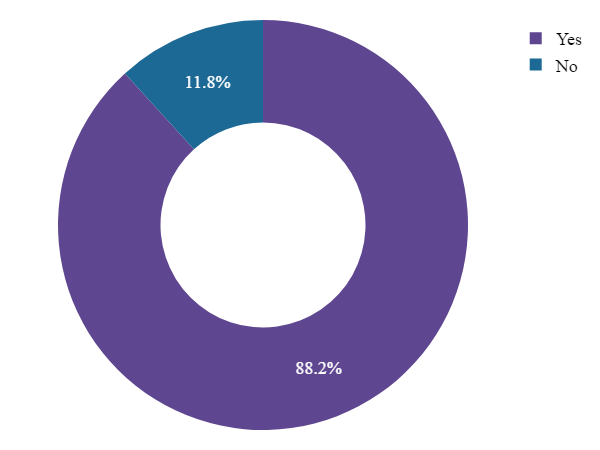

In [23]:
#=====================================
# RQ1 - How many participants used ChatGPT?
#-------------------------------------

# Group counts based on either Yes(1) or No(0).
#-------------------------------------
rq1_counts = data['rq1_question'].value_counts()    

# Show percentage proportion of the population each group holds.
#-------------------------------------
rq1_pcts = (rq1_counts / rq1_counts.sum())          

# View proportion of results.
#-------------------------------------
print(rq1_counts,rq1_pcts * 100)                    

# Create pie chart to visualise results.
#-------------------------------------
fig = px.pie\
    (                                       
        values = rq1_counts
        #,names = rq1_counts.index
        ,names = ['Yes','No']
        ,labels = rq1_pcts
        ,hole = .5
        ,color_discrete_sequence = px.colors.carto.Prism
        ,width = 600
    )

# Update pie chart layout.
#-------------------------------------
fig.update_layout\
    (
        margin=dict(l=20,r=20,t=20,b=20)
        ,font=dict(family = "times New Roman",size = 18,color = '#000000')
    )

# Used to preview chart and save as image.
#-------------------------------------
#fig.show()

# Import previously saved chart image to render into pdf format.
#-------------------------------------
Image('Figure 1 - RQ1 - Dissertation - LouisOthen.png')

\pagebreak

### RQ2 - If ChatGPT is being used by the participant, did the use of it enhance a user’s knowledge?

rq2_question
1    15
Name: count, dtype: int64 rq2_question
1    100.0
Name: count, dtype: float64


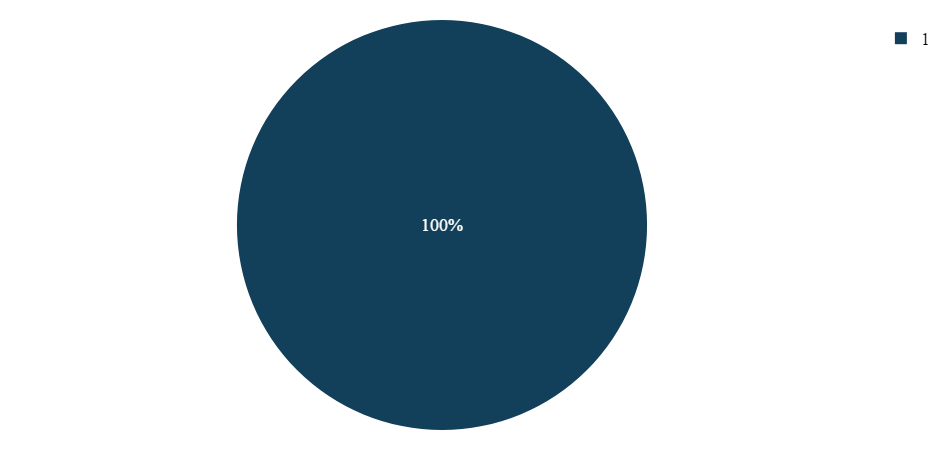

In [24]:
#=====================================
# RQ2 - If ChatGPT is being used by the participant, did the use of it enhance a user’s knowledge?
#-------------------------------------

# Subset data where ChatGPT was used.
#-------------------------------------
data_used_chatgpt = data.query("rq1_question == 1")  

# Group counts based on either Yes(1) or No(0).
#-------------------------------------
rq2_counts = data_used_chatgpt['rq2_question'].value_counts()   

# Show percentage proportion of the population each group holds.
#-------------------------------------
rq2_pcts = (rq2_counts / rq2_counts.sum())                      

# View proportion of results.
#-------------------------------------
print(rq2_counts,rq2_pcts * 100)

# Create pie chart to visualise results.
#-------------------------------------
fig = px.pie\
    (                                                
        values = rq2_counts
        ,names = rq2_counts.index
        ,labels = rq2_pcts
        ,hole = 0
        ,color_discrete_sequence = px.colors.carto.Darkmint_r
    )

# Update pie chart layout.
#-------------------------------------
fig.update_layout\
    (
        margin=dict(l = 20,r = 20,t = 20,b = 20)
        ,font=dict(family = "times New Roman",size = 18,color = '#000000')
    )

# Used to preview chart and save as image.
#-------------------------------------
#fig.show()

# Import previously saved chart image to render into pdf format.
#-------------------------------------
Image('RQ2 - Dissertation - LouisOthen.png')

\pagebreak

### RQ3 - If ChatGPT did enhance a user's knowledge, has ChatGPT been adopted by the user for routine knowledge acquisition?

rq3_question
1    10
0     5
Name: count, dtype: int64 rq3_question
1    66.666667
0    33.333333
Name: count, dtype: float64


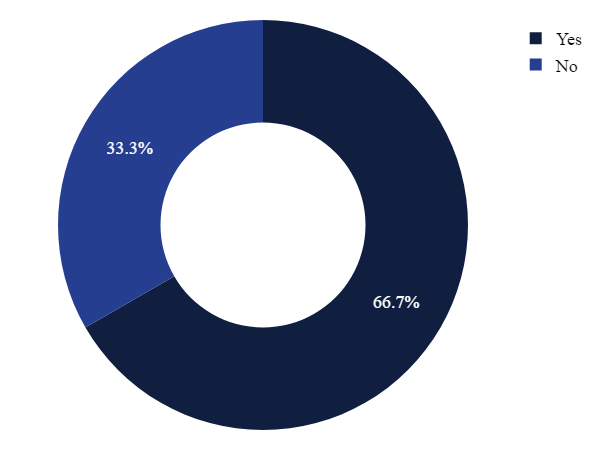

In [25]:
#=====================================
# RQ3 - If ChatGPT did enhance a user's knowledge, has ChatGPT been adopted by the user for routine knowledge acquisition?
#-------------------------------------

# Subset data where knowledge enhancement was reported.
#-------------------------------------
data_enhanced_knowledge = data.query("rq2_question == 1")    

# Group counts based on either Yes(1) or No(0).

rq3_counts = data_enhanced_knowledge['rq3_question'].value_counts()  

# View percentage proportion of the population each group holds.
#-------------------------------------
rq3_pcts = (rq3_counts / rq3_counts.sum())                              
print(rq3_counts,rq3_pcts * 100)

# Create pie chart to visualise results.
#-------------------------------------
fig = px.pie\
    (                                                       
        values = rq3_counts
        ,names = ['Yes','No']
        ,labels = rq3_pcts
        ,hole = 0.5
        ,color_discrete_sequence = px.colors.cmocean.delta
        ,width = 600
    )

# Update pie chart layout.
#-------------------------------------
fig.update_layout\
    (
        margin=dict(l = 20,r = 20,t = 20,b = 20)
        ,font=dict(family = "times New Roman",size = 18,color = '#000000')
    )

# Used to preview chart and save as image.
#-------------------------------------
#fig.show()

# Import previously saved chart image to render into pdf format.
#-------------------------------------
Image('Figure 2 - RQ3 - Dissertation - LouisOthen.png')

Now the descriptive analysis is applied against the research questions, the next section looks to answer the research hypotheses proposed.

\pagebreak

# Hypothesis Testing and Pearson's Correlation Coefficient

## Binomial Test - RH1 - The utilisation of ChatGPT increases the likelihood of enhancing a user's knowledge on a specific topic.

In [26]:
# Bring in responses where they have used ChatGPT before.
#-------------------------------------
rh1_data = data.query("rq1_question == 1")  

# Use series of responses on knowledge enhancement for a user.
#-------------------------------------
rh1_data = rh1_data['rq2_question']         

# Show output from rh1 series.
#-------------------------------------
#print(rh1_data, '\n')             
         
# Store number of successes from rh1_data.
#-------------------------------------
rh1_successes   = sum(rh1_data)           

# Store total number of trials from rh1_data.
#-------------------------------------
rh1_trials      = len(rh1_data)             

# Assumption of null hypothesis, only 50% or less of participants reported knowledge enhancement from ChatGPT.
#-------------------------------------
rh1_probability = 0.5                       

# Perform Binomial Test and record p-value.
#-------------------------------------
rh1_p_value = binom_test(
                            x = rh1_successes
                            ,n = rh1_trials
                            ,p = rh1_probability
                            ,alternative='greater'
                        )

print('Number of successes: ', rh1_successes)

print('Number of trials: ',rh1_trials,'\n')

print(
        'p-value from binomial hypothesis test:'
        ,np.format_float_positional(rh1_p_value,trim = '-')
     )

# Confirm if Null hypothesis rejected.
#-------------------------------------
if rh1_p_value < 0.05:
    print('Therefore, hypothesis RH1 is accepted and the null hypothesis is rejected.')
elif rh1_p_value >= 0.05:
    print('Therefore, hypothesis RH1 is rejected and failed to reject the null hypothesis.')
    

Number of successes:  15
Number of trials:  15 

p-value from binomial hypothesis test: 0.000030517578125
Therefore, hypothesis RH1 is accepted and the null hypothesis is rejected.


\pagebreak

## Binomial Test - RH2 - Users who perceive ChatGPT as enhancing their knowledge are more likely to incorporate ChatGPT into their routine for knowledge acquisition compared to those who do not perceive ChatGPT as enhancing their knowledge.

In [27]:
# Bring in responses where knowledge enhancement was found.
#-------------------------------------
rh2_data = data.query("rq2_question == 1")  

# Use series of responses on knowledge enhancement for a user.
#-------------------------------------
rh2_data = rh2_data['rq3_question']         

# Show output from rh1 series.
#-------------------------------------
#print(rh2_data)                            

# Store number of successes from rh1_data.
#-------------------------------------
rh2_successes   = sum(rh2_data)             

# Store total number of trials from rh1_data.
#-------------------------------------
rh2_trials      = len(rh2_data)             

# Assumption of null hypothesis, only 50% or less of participants reported incorporation of ChatGPT.
#-------------------------------------
rh2_probability = 0.5                      

# Perform Binomial Test and record p-value.
#-------------------------------------
rh2_p_value = binom_test(
                            x = rh2_successes
                            ,n = rh2_trials
                            ,p = rh2_probability
                            ,alternative= 'greater'
                        )

print('Number of successes: ',rh2_successes)

print('Number of trials: ',rh2_trials)

print(
        'p-value from binomial hypothesis test:'
        ,np.format_float_positional(rh2_p_value,trim = '-')
     )

# Confirm if Null hypothesis rejected.
#-------------------------------------
if rh2_p_value < 0.05:
    print('Therefore, hypothesis RH2 is accepted and the null hypothesis is rejected.')
elif rh2_p_value >= 0.05:
    print('Therefore, hypothesis RH2 is rejected and failed to reject the null hypothesis.')
    

Number of successes:  10
Number of trials:  15
p-value from binomial hypothesis test: 0.15087890624999997
Therefore, hypothesis RH2 is rejected and failed to reject the null hypothesis.


\pagebreak

## RH2 - Pearsons Correlation Coefficient

              rq2_question  rq3_question
rq2_question      1.000000      0.620661
rq3_question      0.620661      1.000000


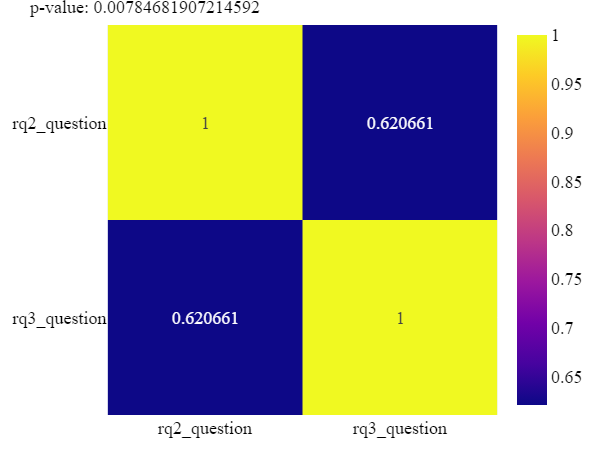

In [28]:
# Bring results of RQ2 and RQ3 questions in data.
#-------------------------------------
data_for_corr = data[['rq2_question','rq3_question']]

# Show results of pandas.DataFrame.corr.
#-------------------------------------
print(data_for_corr.corr(method = 'pearson'))

# Compute pearsonr function from the scipy.stats package.
#-------------------------------------
pearson_results = pearsonr(data['rq2_question'],data['rq3_question'])

# Create correlation matrix to visualise results.
#-------------------------------------
fig = px.imshow(
                data_for_corr.corr(method='pearson')
                ,text_auto = True
                ,title = f"p-value: {pearson_results.pvalue}"
                ,width = 600
                )

# Update chart layout.
#-------------------------------------
fig.update_layout(
                    margin=dict(l=25, r=25, t=25, b=25)
                    ,title=dict(
                                font=dict(
                                            family = "Times New Roman",
                                            size = 18,
                                            color = '#000000'
                                        )
                                )
                    ,font=dict(
                                family = "times New Roman"
                                ,size  = 18
                                ,color ='#000000'
                              )
                    )

# Used to preview chart and save as image.
#-------------------------------------
#fig.show()

# Import previously saved chart image to render into pdf format.
#-------------------------------------
Image('Figure 3 - RH2 - Dissertation - LouisOthen.png')

\pagebreak

# Output Processed Dataset

In [29]:
data.to_csv(folderPath + 'DissertationOutput.csv')

# Additional Insights

## Rating ChatGPT Response

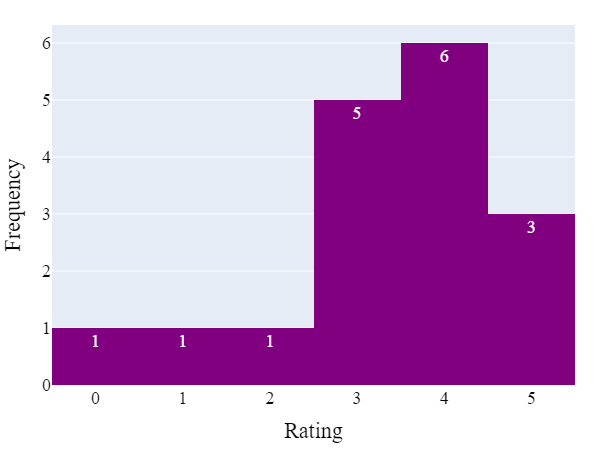

In [30]:
# Create histogram, showing how ChatGPT responses were rated.
#-------------------------------------
fig = px.histogram(
                    data_frame = data['rating_response']
                    , text_auto = True
                    ,nbins = 6
                    ,width = 600
                    ,color_discrete_sequence = ['purple']
                  )

# Update chart layout.
#-------------------------------------
fig.update_xaxes(title_text = 'Rating')
fig.update_yaxes(title_text = 'Frequency')
fig.update_traces(showlegend = False)
fig.update_layout(
                    margin = dict(l = 25,r = 25,t = 25,b = 25)
                    ,font = dict(family = "times New Roman",size = 18,color ='#000000')
                 )

# Used to preview chart and save as image.
#-------------------------------------
#fig.show()

# Import previously saved chart image to render into pdf format.
#-------------------------------------
Image('Figure 4  - Rating ChatGPT Response - LouisOthen.png')


\pagebreak

## Comparing ChatGPT to other tools

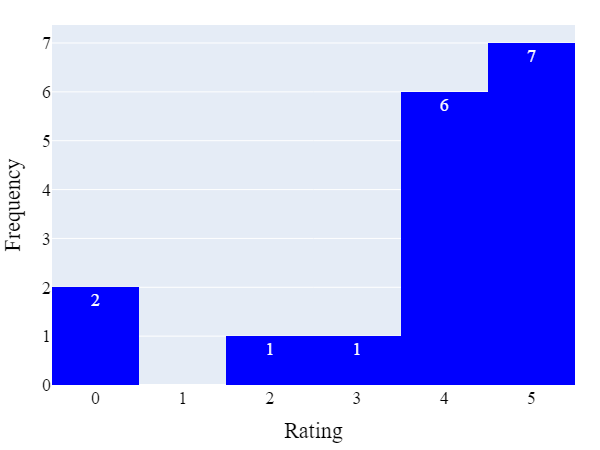

In [31]:
# Create histogram, showing rating of comparison of ChatGPT to other tools.
#-------------------------------------
fig = px.histogram(
                    data_frame = data['rating_comparison_other']
                    ,text_auto = True
                    ,nbins = 6
                    ,width = 600
                    ,color_discrete_sequence = ['blue']
                  )

# Update chart layout.
#-------------------------------------
fig.update_xaxes(title_text = 'Rating')
fig.update_yaxes(title_text = 'Frequency')
fig.update_traces(showlegend = False)
fig.update_layout(
                    margin=dict(l=25, r=25, t=25, b=25)
                    ,font=dict(family = "times New Roman",size = 18,color ='#000000')
                 )

# Used to preview chart and save as image.
#-------------------------------------
#fig.show()

# Import previously saved chart image to render into pdf format.
#-------------------------------------
Image('Figure 5  - Comparing ChatGPT to other tools - LouisOthen.png')
